In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import seaborn as sns
import pandas as pd


#  Preprocessing data



In [2]:
df = pd.read_csv('Data_Negara_HELP.csv')
df.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
df.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [5]:
#convert data pendapatan ke float
df.Pendapatan = df.Pendapatan.astype(float)
df.GDPperkapita = df.GDPperkapita.astype(float)

In [6]:
#Negara dengan Kematian anak terbanyak
df[df.Kematian_anak.values == df.Kematian_anak.values.max()]

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
66,Haiti,208.0,15.3,6.91,64.7,1500.0,5.45,32.1,3.33,662.0


In [7]:
#Negara dengan pendapatan terbanyak
df[df.Pendapatan.values == df.Pendapatan.values.max()]

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
123,Qatar,9.0,62.3,1.81,23.8,125000.0,6.98,79.5,2.07,70300.0


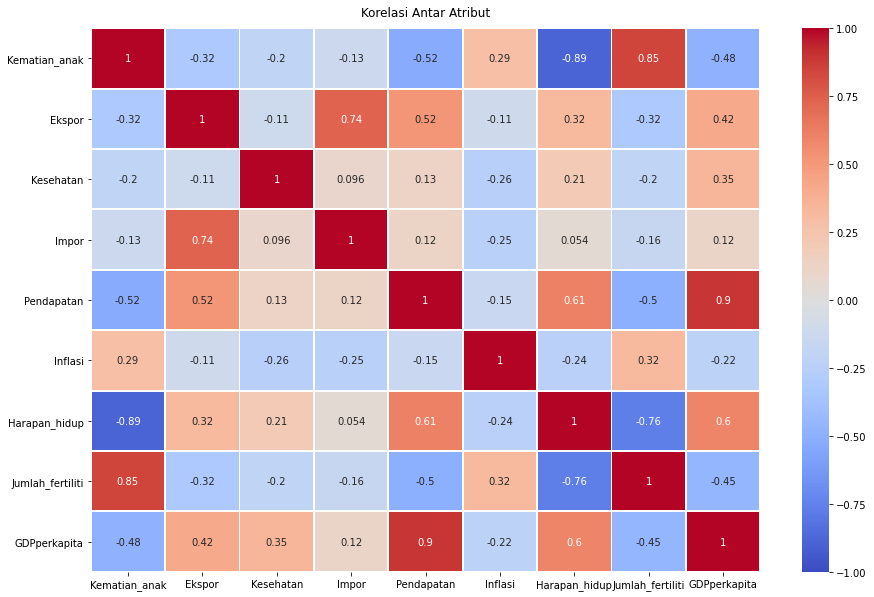

In [8]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(df.corr(),cmap='coolwarm', vmin=-1,annot=True,linewidths=1)
ax.set_title('Korelasi Antar Atribut',fontdict={'fontsize':12},pad=12)
plt.show()

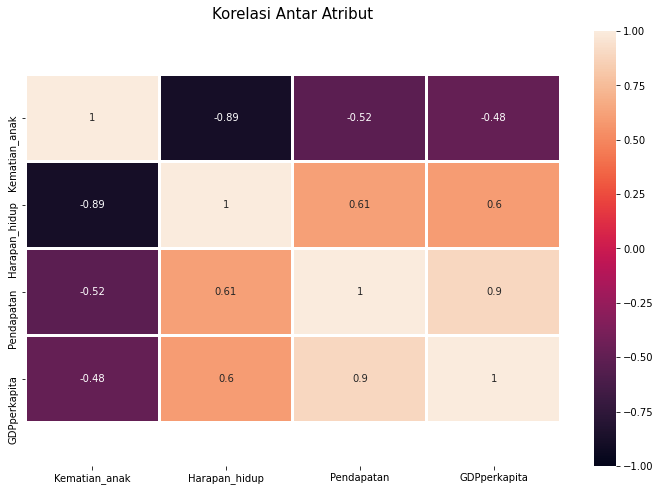

In [9]:
fig2, ax2 = plt.subplots(figsize=(12,8))
sns.heatmap(df[['Kematian_anak','Harapan_hidup','Pendapatan','GDPperkapita']].corr(), vmin=-1 , annot=True,linewidths=2)
ax2.set_title('Korelasi Antar Atribut',fontdict={'fontsize':15},pad=12)
ax2.set_ylim(5-0.5, -0.5)
plt.show()

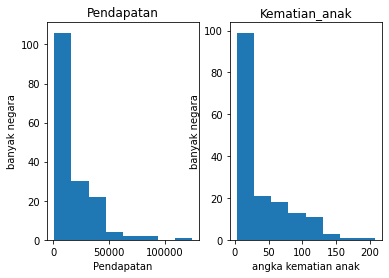

In [10]:
fig10, ax10 = plt.subplots(1,2)
ax10[0].hist(df['Pendapatan'],bins=8)
ax10[0].set_title('Pendapatan')
ax10[0].set_xlabel('Pendapatan')
ax10[0].set_ylabel('banyak negara')
ax10[1].hist(df['Kematian_anak'],bins=8)
ax10[1].set_title('Kematian_anak')
ax10[1].set_xlabel('angka kematian anak')
ax10[1].set_ylabel('banyak negara')
plt.show()


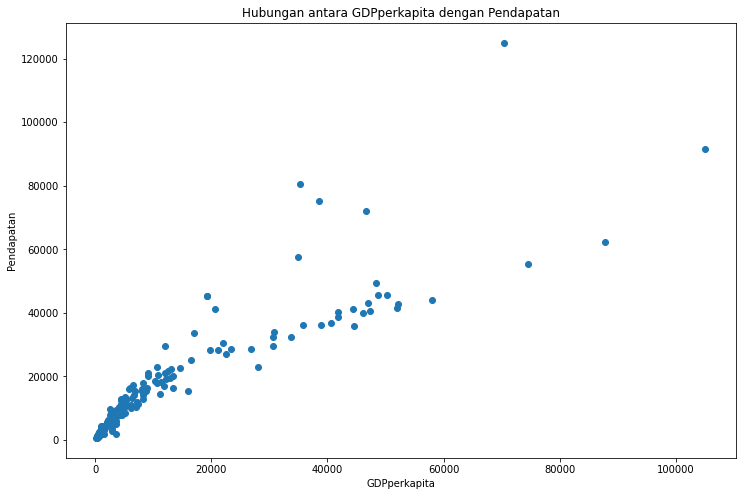

In [11]:
fig20, ax20 = plt.subplots(figsize=(12,8))
ax20.scatter(df['GDPperkapita'],df['Pendapatan'])
ax20.set_xlabel('GDPperkapita')
ax20.set_ylabel('Pendapatan')
ax20.set_title('Hubungan antara GDPperkapita dengan Pendapatan')
plt.show()

# Eksplorasi Data dan Cleansing 

In [12]:
#saya menggunakan atribut negara, pendapatan, GDPperkapita, harapan hidup memiliki nilai korelasi mendekati 1

db = df[['Negara','Pendapatan','GDPperkapita','Harapan_hidup','Kematian_anak']]
db

,Negara,Pendapatan,GDPperkapita,Harapan_hidup,Kematian_anak
0,Afghanistan,1610.0,553.0,56.2,90.2
1,Albania,9930.0,4090.0,76.3,16.6
2,Algeria,12900.0,4460.0,76.5,27.3
3,Angola,5900.0,3530.0,60.1,119.0
4,Antigua and Barbuda,19100.0,12200.0,76.8,10.3
...,...,...,...,...,...
162,Vanuatu,2950.0,2970.0,63.0,29.2
163,Venezuela,16500.0,13500.0,75.4,17.1
164,Vietnam,4490.0,1310.0,73.1,23.3
165,Yemen,4480.0,1310.0,67.5,56.3


In [13]:
#cek apakah ada nilai missing berupa string
print(db.Negara.unique())
print(db.Pendapatan.unique())

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada'
 'Cape Verde' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Congo, Dem. Rep.' 'Congo, Rep.' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Cyprus' 'Czech Republic' 'Denmark' 'Dominican Republic'
 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia'
 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana'
 'Greece' 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti'
 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel'
 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan' 'Kenya' 'Kiribati'
 'Kuwait' 'Kyrgyz Republic' 'Lao' 'Latvia' 'Lebanon' 'Lesotho' 'Liberia'
 '

In [14]:
print(db.GDPperkapita.unique())
print(db.Harapan_hidup.unique())

[   553.   4090.   4460.   3530.  12200.  10300.   3220.  51900.  46900.
   5840.  28000.  20700.    758.  16000.   6030.  44400.   4340.   2180.
   1980.   4610.   6350.  11200.  35300.   6840.    575.    231.    786.
   1310.  47400.   3310.    446.    897.  12900.   4560.   6250.    769.
    334.   2740.   8200.   1220.  13500.  30800.  19800.  58000.   5450.
   4660.   2600.   2990.  17100.    482.  14600.   3650.  46200.  40600.
   8750.    562.   2960.  41800.  26900.   7370.   2830.    648.    547.
   3040.    662.  13100.  41900.   1350.   3110.   6530.   4500.  48700.
  30600.  35800.   4680.  44500.   3680.   9070.    967.   1490.  38500.
    880.   1140.  11300.   8860.   1170.    327.  12100.  12000. 105000.
   4540.    413.    459.   7100.    708.  21100.   1200.   8000.   2860.
   1630.   2650.   6680.    419.    988.   5190.    592.  50300.  33700.
    348.   2330.  87800.  19300.   1040.   8080.   3230.   5020.   2130.
  12600.  22500.  70300.   8230.  10700.    563.   

In [15]:
print(db.Kematian_anak.unique())

[ 90.2  16.6  27.3 119.   10.3  14.5  18.1   4.8   4.3  39.2  13.8   8.6
  49.4  14.2   5.5   4.5  18.8 111.   42.7  46.6   6.9  52.5  19.8  10.5
  10.8 116.   93.6  44.4 108.    5.6  26.5 149.  150.    8.7  15.7  18.6
  88.2  63.9  10.2   3.6   3.4   4.1  34.4  25.1  29.1  19.2  55.2  24.1
   3.    4.2  63.7  80.3  16.5  74.7   3.9  14.6  35.4 109.  114.   37.6
 208.    6.    2.6  58.8  33.3  19.3  36.9   4.6   4.    3.2  21.1  21.5
  62.2  62.7  29.6  78.9   7.8  99.7  89.3   6.1   2.8  10.4  90.5   7.9
  13.2 137.    6.8  97.4  15.   40.   17.2  26.1  33.5 101.   64.4  56.
  47.    6.2 123.  130.   11.7  92.1  19.7  20.3  31.9   9.   11.5  10.
  63.6  18.9  66.8   7.6  14.4 160.    7.   28.1  53.7   3.8  11.2  20.7
  76.7  52.4  71.9  14.9  62.6  90.3  17.4  19.1  62.   81.    5.2   7.3
  10.6  36.3  29.2  17.1  23.3  56.3  83.1]


In [16]:
#cek missing value dari kedua atribut
db.isna().sum().sum()

0

In [17]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Negara         167 non-null    object 
 1   Pendapatan     167 non-null    float64
 2   GDPperkapita   167 non-null    float64
 3   Harapan_hidup  167 non-null    float64
 4   Kematian_anak  167 non-null    float64
dtypes: float64(4), object(1)
memory usage: 6.6+ KB


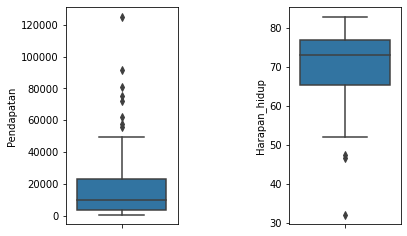

In [18]:
#melihat outlier(anomali)
fig, axs = plt.subplots(1,2)
sns.boxplot(y=db["Pendapatan"], ax=axs[0])
sns.boxplot(y=db["Harapan_hidup"], ax=axs[1])
plt.subplots_adjust(wspace=1)

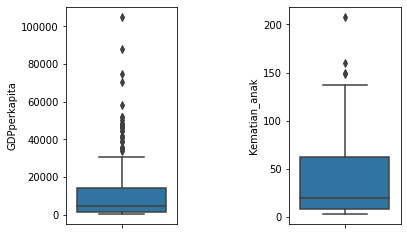

In [19]:
fig, axs = plt.subplots(1,2)
sns.boxplot(y=db["GDPperkapita"], ax=axs[0])
sns.boxplot(y=db["Kematian_anak"], ax=axs[1])
plt.subplots_adjust(wspace=1)

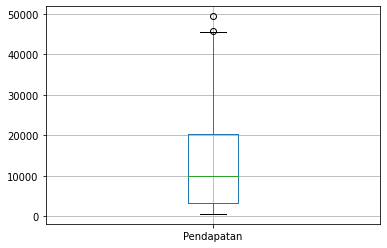

In [20]:
#handling outlier
q1 = db['Pendapatan'].quantile(0.25)
q3 = db['Pendapatan'].quantile(0.75)
iqr = q3-q1
lw = q1-(1.5*iqr)
uw = q3+(1.5*iqr)
db = db[db['Pendapatan'] > lw] 
db = db[db['Pendapatan'] < uw]
#cek outlier
db.boxplot(column=["Pendapatan"])

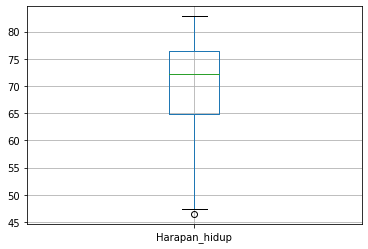

In [21]:
#handling outlier
q1 = db['Harapan_hidup'].quantile(0.25)
q3 = db['Harapan_hidup'].quantile(0.75)
iqr = q3-q1
lw = q1-(1.5*iqr)
uw = q3+(1.5*iqr)
db = db[db['Harapan_hidup'] > lw] 
db = db[db['Harapan_hidup'] < uw]
#cek outlier
db.boxplot(column=["Harapan_hidup"])

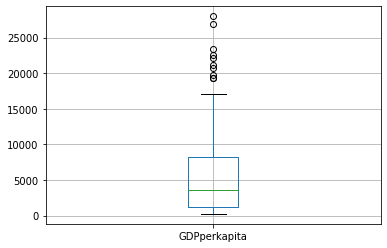

In [22]:
#handling outlier
q1 = db['GDPperkapita'].quantile(0.25)
q3 = db['GDPperkapita'].quantile(0.75)
iqr = q3-q1
lw = q1-(1.5*iqr)
uw = q3+(1.5*iqr)
db = db[db['GDPperkapita'] > lw] 
db = db[db['GDPperkapita'] < uw]
#cek outlier
db.boxplot(column=["GDPperkapita"])

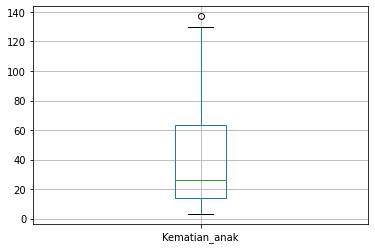

In [23]:
#handling outlier
q1 = db['Kematian_anak'].quantile(0.25)
q3 = db['Kematian_anak'].quantile(0.75)
iqr = q3-q1
lw = q1-(1.5*iqr)
uw = q3+(1.5*iqr)
db = db[db['Kematian_anak'] > lw] 
db = db[db['Kematian_anak'] < uw]
#cek outlier
db.boxplot(column=["Kematian_anak"])

In [24]:
db.dropna(inplace=True)
db.isna().sum()

Negara           0
Pendapatan       0
GDPperkapita     0
Harapan_hidup    0
Kematian_anak    0
dtype: int64

In [25]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135 entries, 0 to 166
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Negara         135 non-null    object 
 1   Pendapatan     135 non-null    float64
 2   GDPperkapita   135 non-null    float64
 3   Harapan_hidup  135 non-null    float64
 4   Kematian_anak  135 non-null    float64
dtypes: float64(4), object(1)
memory usage: 6.3+ KB


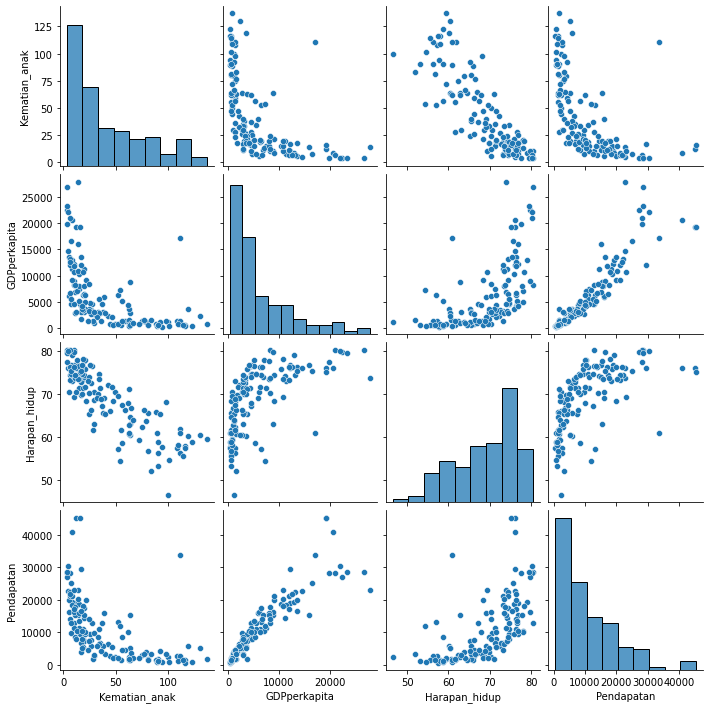

In [26]:
sns.pairplot(vars=['Kematian_anak','GDPperkapita','Harapan_hidup','Pendapatan'],data=db)
plt.show()

In [27]:
db

,Negara,Pendapatan,GDPperkapita,Harapan_hidup,Kematian_anak
0,Afghanistan,1610.0,553.0,56.2,90.2
1,Albania,9930.0,4090.0,76.3,16.6
2,Algeria,12900.0,4460.0,76.5,27.3
3,Angola,5900.0,3530.0,60.1,119.0
4,Antigua and Barbuda,19100.0,12200.0,76.8,10.3
...,...,...,...,...,...
162,Vanuatu,2950.0,2970.0,63.0,29.2
163,Venezuela,16500.0,13500.0,75.4,17.1
164,Vietnam,4490.0,1310.0,73.1,23.3
165,Yemen,4480.0,1310.0,67.5,56.3


In [28]:
#min max normalization
def normalize(x):
    return (x - x.min())/(x.max() - x.min())

db['Pendapatan'] = db[['Pendapatan']].apply(normalize)
db['GDPperkapita'] = db[['GDPperkapita']].apply(normalize)
db['Harapan_hidup'] = db[['Harapan_hidup']].apply(normalize)
db['Kematian_anak'] = db[['Kematian_anak']].apply(normalize)
db

,Negara,Pendapatan,GDPperkapita,Harapan_hidup,Kematian_anak
0,Afghanistan,0.022348,0.011596,0.286136,0.650224
1,Albania,0.208100,0.138968,0.879056,0.100149
2,Algeria,0.274408,0.152292,0.884956,0.180120
3,Angola,0.118126,0.118802,0.401180,0.865471
4,Antigua and Barbuda,0.412828,0.431020,0.893805,0.053064
...,...,...,...,...,...
162,Vanuatu,0.052265,0.098635,0.486726,0.194320
163,Venezuela,0.354781,0.477835,0.852507,0.103886
164,Vietnam,0.086647,0.038856,0.784661,0.150224
165,Yemen,0.086424,0.038856,0.619469,0.396861


In [29]:
#simpan data menjadi csv yang baru
db.to_csv('data_test.csv',index=False)

## Clustering menggunakan K-Means

In [30]:
datatest = pd.read_csv('data_test.csv')
datatest

,Negara,Pendapatan,GDPperkapita,Harapan_hidup,Kematian_anak
0,Afghanistan,0.022348,0.011596,0.286136,0.650224
1,Albania,0.208100,0.138968,0.879056,0.100149
2,Algeria,0.274408,0.152292,0.884956,0.180120
3,Angola,0.118126,0.118802,0.401180,0.865471
4,Antigua and Barbuda,0.412828,0.431020,0.893805,0.053064
...,...,...,...,...,...
130,Vanuatu,0.052265,0.098635,0.486726,0.194320
131,Venezuela,0.354781,0.477835,0.852507,0.103886
132,Vietnam,0.086647,0.038856,0.784661,0.150224
133,Yemen,0.086424,0.038856,0.619469,0.396861


# Clustering 1 (Pendapatan dan GDPperkapita)

In [31]:
a = datatest[['Negara','Pendapatan','GDPperkapita']]
a

,Negara,Pendapatan,GDPperkapita
0,Afghanistan,0.022348,0.011596
1,Albania,0.208100,0.138968
2,Algeria,0.274408,0.152292
3,Angola,0.118126,0.118802
4,Antigua and Barbuda,0.412828,0.431020
...,...,...,...
130,Vanuatu,0.052265,0.098635
131,Venezuela,0.354781,0.477835
132,Vietnam,0.086647,0.038856
133,Yemen,0.086424,0.038856


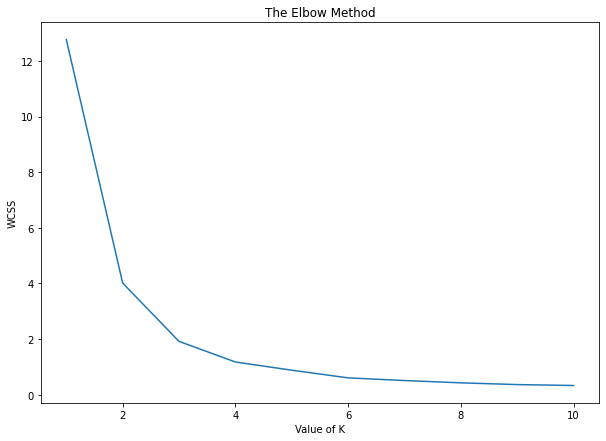

In [32]:
#mencari 'optimal number of cluster' berdasarkan nilai inersia

wcss1 = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init='k-means++',random_state=44)
    kmeans.fit(a[['Pendapatan','GDPperkapita']])
    wcss1.append(kmeans.inertia_)
    
fig3, ax3 = plt.subplots(figsize=(10,7))
ax3.plot(range(1,11),wcss1)
ax3.set_xlabel('Value of K')
ax3.set_ylabel('WCSS')
ax3.set_title('The Elbow Method')
plt.show()

In [33]:
#k = 3
kmeans1 = KMeans(n_clusters=3,random_state=44).fit(a[['Pendapatan','GDPperkapita']])
labels1 = kmeans1.labels_
df_cluster1 = pd.DataFrame(data=a,columns=['Negara','Pendapatan','GDPperkapita'])
df_cluster1['k_3'] = labels1
df_cluster1

,Negara,Pendapatan,GDPperkapita,k_3
0,Afghanistan,0.022348,0.011596,1
1,Albania,0.208100,0.138968,1
2,Algeria,0.274408,0.152292,1
3,Angola,0.118126,0.118802,1
4,Antigua and Barbuda,0.412828,0.431020,0
...,...,...,...,...
130,Vanuatu,0.052265,0.098635,1
131,Venezuela,0.354781,0.477835,0
132,Vietnam,0.086647,0.038856,1
133,Yemen,0.086424,0.038856,1


In [34]:
# k = 4
kmeans2 = KMeans(n_clusters=4,random_state=44).fit(a[['Pendapatan','GDPperkapita']])
labels2 = kmeans2.labels_
df_cluster1['k_4'] = labels2
df_cluster1

,Negara,Pendapatan,GDPperkapita,k_3,k_4
0,Afghanistan,0.022348,0.011596,1,0
1,Albania,0.208100,0.138968,1,3
2,Algeria,0.274408,0.152292,1,3
3,Angola,0.118126,0.118802,1,0
4,Antigua and Barbuda,0.412828,0.431020,0,1
...,...,...,...,...,...
130,Vanuatu,0.052265,0.098635,1,0
131,Venezuela,0.354781,0.477835,0,1
132,Vietnam,0.086647,0.038856,1,0
133,Yemen,0.086424,0.038856,1,0


In [35]:
#k = 2
kmeans3 = KMeans(n_clusters=2,random_state=44).fit(a[['Pendapatan','GDPperkapita']])
labels3 = kmeans3.labels_
df_cluster1['k_2'] = labels3
df_cluster1

,Negara,Pendapatan,GDPperkapita,k_3,k_4,k_2
0,Afghanistan,0.022348,0.011596,1,0,1
1,Albania,0.208100,0.138968,1,3,1
2,Algeria,0.274408,0.152292,1,3,1
3,Angola,0.118126,0.118802,1,0,1
4,Antigua and Barbuda,0.412828,0.431020,0,1,0
...,...,...,...,...,...,...
130,Vanuatu,0.052265,0.098635,1,0,1
131,Venezuela,0.354781,0.477835,0,1,0
132,Vietnam,0.086647,0.038856,1,0,1
133,Yemen,0.086424,0.038856,1,0,1


In [36]:
from sklearn.metrics import silhouette_score

print('k = 3 :',silhouette_score(df_cluster1[['Pendapatan','GDPperkapita']],labels=labels1))
print('k = 4 :',silhouette_score(df_cluster1[['Pendapatan','GDPperkapita']],labels=labels2))
print('k = 2 :',silhouette_score(df_cluster1[['Pendapatan','GDPperkapita']],labels=labels3))


k = 3 : 0.6136013306506369
k = 4 : 0.5649505733656974
k = 2 : 0.6492053218355637


In [37]:
#drop nilai k yang kecil
df_cluster1 = df_cluster1.drop(columns=['k_3','k_4'])
df_cluster1

,Negara,Pendapatan,GDPperkapita,k_2
0,Afghanistan,0.022348,0.011596,1
1,Albania,0.208100,0.138968,1
2,Algeria,0.274408,0.152292,1
3,Angola,0.118126,0.118802,1
4,Antigua and Barbuda,0.412828,0.431020,0
...,...,...,...,...
130,Vanuatu,0.052265,0.098635,1
131,Venezuela,0.354781,0.477835,0
132,Vietnam,0.086647,0.038856,1
133,Yemen,0.086424,0.038856,1


jumlah cluster = 2


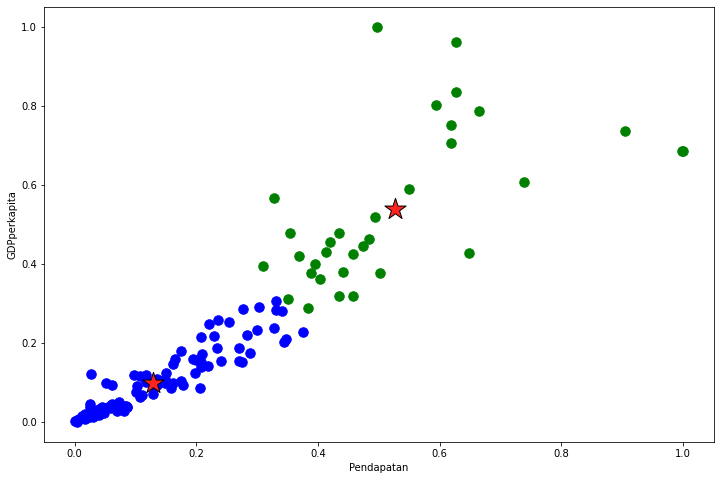

In [38]:
#visualisasi data hasil cluster dengan jumlah cluster 2

print('jumlah cluster = 2')
fig4, ax4 = plt.subplots(figsize=(12,8))
ax4.scatter(df_cluster1['Pendapatan'][df_cluster1.k_2 == 0],
            df_cluster1['GDPperkapita'][df_cluster1.k_2 == 0],
            c='green',s=90,edgecolor='green')
ax4.scatter(df_cluster1['Pendapatan'][df_cluster1.k_2 == 1],
            df_cluster1['GDPperkapita'][df_cluster1.k_2 == 1],
            c='blue',s=90,edgecolor='blue')


ax4.set_xlabel('Pendapatan')
ax4.set_ylabel('GDPperkapita')

centers = kmeans3.cluster_centers_
ax4.scatter(centers[:,0],centers[:,1],marker='*',s=500,c = '#ff2222', edgecolors='black')
plt.show()

# Clustering 2 (Kematian_anak dan Harapan_hidup)

In [39]:
b = datatest[['Negara','Kematian_anak','Harapan_hidup']]
b

,Negara,Kematian_anak,Harapan_hidup
0,Afghanistan,0.650224,0.286136
1,Albania,0.100149,0.879056
2,Algeria,0.180120,0.884956
3,Angola,0.865471,0.401180
4,Antigua and Barbuda,0.053064,0.893805
...,...,...,...
130,Vanuatu,0.194320,0.486726
131,Venezuela,0.103886,0.852507
132,Vietnam,0.150224,0.784661
133,Yemen,0.396861,0.619469


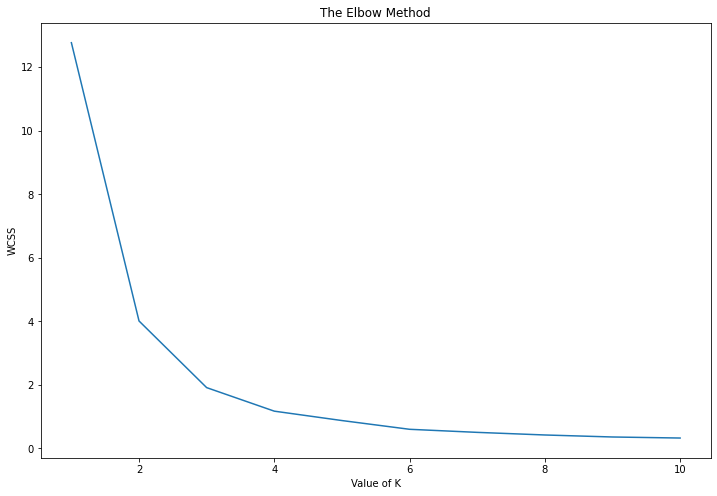

In [40]:
# mencari 'optimal number of cluster' berdasarkan nilai inersia

wcss2 = []
for i in range(1,11):
    kmeans10 = KMeans(n_clusters = i,init='k-means++',random_state=44)
    kmeans10.fit(b[['Kematian_anak','Harapan_hidup']])
    wcss2.append(kmeans10.inertia_)
    
fig5, ax5 = plt.subplots(figsize=(12,8))
ax5.plot(range(1,11),wcss1)
ax5.set_xlabel('Value of K')
ax5.set_ylabel('WCSS')
ax5.set_title('The Elbow Method')
plt.show()

In [41]:
#k = 3
kmeans1_model2 = KMeans(n_clusters=2,random_state=44).fit(b[['Kematian_anak','Harapan_hidup']])
labels1_model2 = kmeans1_model2.labels_
df_cluster2 = pd.DataFrame(data=b,columns=['Negara','Kematian_anak','Harapan_hidup'])
df_cluster2['k_3'] = labels1_model2
df_cluster2

,Negara,Kematian_anak,Harapan_hidup,k_3
0,Afghanistan,0.650224,0.286136,1
1,Albania,0.100149,0.879056,0
2,Algeria,0.180120,0.884956,0
3,Angola,0.865471,0.401180,1
4,Antigua and Barbuda,0.053064,0.893805,0
...,...,...,...,...
130,Vanuatu,0.194320,0.486726,0
131,Venezuela,0.103886,0.852507,0
132,Vietnam,0.150224,0.784661,0
133,Yemen,0.396861,0.619469,1


In [42]:
#k = 4
kmeans2_model2 = KMeans(n_clusters=3,random_state=44).fit(b[['Kematian_anak','Harapan_hidup']])
labels2_model2 = kmeans2_model2.labels_
df_cluster2['k_4'] = labels2_model2
df_cluster2

,Negara,Kematian_anak,Harapan_hidup,k_3,k_4
0,Afghanistan,0.650224,0.286136,1,1
1,Albania,0.100149,0.879056,0,0
2,Algeria,0.180120,0.884956,0,0
3,Angola,0.865471,0.401180,1,1
4,Antigua and Barbuda,0.053064,0.893805,0,0
...,...,...,...,...,...
130,Vanuatu,0.194320,0.486726,0,2
131,Venezuela,0.103886,0.852507,0,0
132,Vietnam,0.150224,0.784661,0,0
133,Yemen,0.396861,0.619469,1,2


In [43]:
#k=2
kmeans3_model2 = KMeans(n_clusters=4,random_state=44).fit(b[['Kematian_anak','Harapan_hidup']])
labels3_model2 = kmeans3_model2.labels_
df_cluster2['k_2'] = labels3_model2
df_cluster2

,Negara,Kematian_anak,Harapan_hidup,k_3,k_4,k_2
0,Afghanistan,0.650224,0.286136,1,1,2
1,Albania,0.100149,0.879056,0,0,3
2,Algeria,0.180120,0.884956,0,0,3
3,Angola,0.865471,0.401180,1,1,2
4,Antigua and Barbuda,0.053064,0.893805,0,0,3
...,...,...,...,...,...,...
130,Vanuatu,0.194320,0.486726,0,2,0
131,Venezuela,0.103886,0.852507,0,0,3
132,Vietnam,0.150224,0.784661,0,0,3
133,Yemen,0.396861,0.619469,1,2,1


In [44]:
print('k = 2 :',silhouette_score(df_cluster2[['Kematian_anak','Harapan_hidup']],labels=labels1_model2))
print('k = 3 :',silhouette_score(df_cluster2[['Kematian_anak','Harapan_hidup']],labels=labels2_model2))
print('k = 4 :',silhouette_score(df_cluster2[['Kematian_anak','Harapan_hidup']],labels=labels3_model2))


k = 2 : 0.6361178945542445
k = 3 : 0.5444609307402202
k = 4 : 0.4722812428186107


In [45]:
#drop nilai cluster yang kecil
df_cluster2 = df_cluster2.drop(columns=['k_3','k_4'])
df_cluster2

,Negara,Kematian_anak,Harapan_hidup,k_2
0,Afghanistan,0.650224,0.286136,2
1,Albania,0.100149,0.879056,3
2,Algeria,0.180120,0.884956,3
3,Angola,0.865471,0.401180,2
4,Antigua and Barbuda,0.053064,0.893805,3
...,...,...,...,...
130,Vanuatu,0.194320,0.486726,0
131,Venezuela,0.103886,0.852507,3
132,Vietnam,0.150224,0.784661,3
133,Yemen,0.396861,0.619469,1


n_cluster = 2


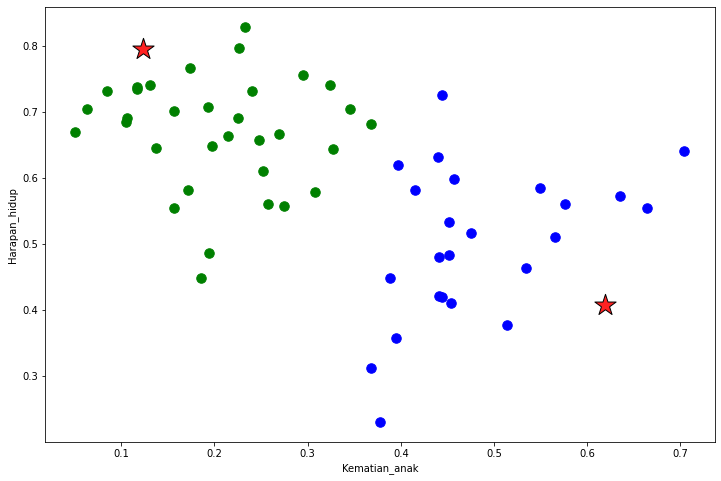

In [46]:
#visualisasi data hasil cluster dengan jumlah cluster 2

print('n_cluster = 2')
fig6, ax6 = plt.subplots(figsize=(12,8))
ax6.scatter(df_cluster2['Kematian_anak'][df_cluster2.k_2 == 0],
            df_cluster2['Harapan_hidup'][df_cluster2.k_2 == 0],
            c='green',s=90,edgecolor='green')
ax6.scatter(df_cluster2['Kematian_anak'][df_cluster2.k_2 == 1],
            df_cluster2['Harapan_hidup'][df_cluster2.k_2 == 1],
            c='blue',s=90,edgecolor='blue')


ax6.set_xlabel('Kematian_anak')
ax6.set_ylabel('Harapan_hidup')

centers2 = kmeans1_model2.cluster_centers_
ax6.scatter(centers2[:,0],centers2[:,1],marker='*',s=500,c = '#ff2222', edgecolors='black')
plt.show()

In [47]:
#ambil yg cluster nya 0

df_cluster1

,Negara,Pendapatan,GDPperkapita,k_2
0,Afghanistan,0.022348,0.011596,1
1,Albania,0.208100,0.138968,1
2,Algeria,0.274408,0.152292,1
3,Angola,0.118126,0.118802,1
4,Antigua and Barbuda,0.412828,0.431020,0
...,...,...,...,...
130,Vanuatu,0.052265,0.098635,1
131,Venezuela,0.354781,0.477835,0
132,Vietnam,0.086647,0.038856,1
133,Yemen,0.086424,0.038856,1


In [48]:
df_hasil1 = df_cluster1[df_cluster1['k_2'].values == 1]
df_hasil1

,Negara,Pendapatan,GDPperkapita,k_2
0,Afghanistan,0.022348,0.011596,1
1,Albania,0.208100,0.138968,1
2,Algeria,0.274408,0.152292,1
3,Angola,0.118126,0.118802,1
6,Armenia,0.135987,0.107638,1
...,...,...,...,...
129,Uzbekistan,0.081065,0.041377,1
130,Vanuatu,0.052265,0.098635,1
132,Vietnam,0.086647,0.038856,1
133,Yemen,0.086424,0.038856,1


In [49]:
#ambil yang clusternya 1

df_cluster2

,Negara,Kematian_anak,Harapan_hidup,k_2
0,Afghanistan,0.650224,0.286136,2
1,Albania,0.100149,0.879056,3
2,Algeria,0.180120,0.884956,3
3,Angola,0.865471,0.401180,2
4,Antigua and Barbuda,0.053064,0.893805,3
...,...,...,...,...
130,Vanuatu,0.194320,0.486726,0
131,Venezuela,0.103886,0.852507,3
132,Vietnam,0.150224,0.784661,3
133,Yemen,0.396861,0.619469,1


In [50]:
df_hasil2 = df_cluster2[df_cluster2['k_2'].values == 1]
df_hasil2

,Negara,Kematian_anak,Harapan_hidup,k_2
18,Botswana,0.368460,0.312684,1
29,Comoros,0.635277,0.572271,1
31,"Congo, Rep.",0.453662,0.410029,1
41,Eritrea,0.388640,0.448378,1
44,Gabon,0.452167,0.483776,1
45,Gambia,0.576233,0.560472,1
47,Ghana,0.534380,0.463127,1
55,India,0.415546,0.581121,1
62,Kenya,0.440957,0.480826,1
63,Kiribati,0.444694,0.418879,1


In [51]:
hasil_merge = pd.merge(df_hasil1, df_hasil2, on='Negara', how='inner')
hasil_merge

,Negara,Pendapatan,GDPperkapita,k_2_x,Kematian_anak,Harapan_hidup,k_2_y
0,Botswana,0.283338,0.220354,1,0.368460,0.312684,1
1,Comoros,0.017883,0.019374,1,0.635277,0.572271,1
2,"Congo, Rep.",0.102275,0.090353,1,0.453662,0.410029,1
3,Eritrea,0.018106,0.009039,1,0.388640,0.448378,1
4,Gabon,0.330223,0.306781,1,0.452167,0.483776,1
5,Gambia,0.023465,0.011920,1,0.576233,0.560472,1
6,Ghana,0.054721,0.038856,1,0.534380,0.463127,1
7,India,0.084861,0.040297,1,0.415546,0.581121,1
8,Kenya,0.041772,0.026504,1,0.440957,0.480826,1
9,Kiribati,0.025027,0.045338,1,0.444694,0.418879,1
